In [3]:
import pandas as pd
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import glob
import tqdm
import os

# constants
PATH = 'shakespeare.txt'
sw = stopwords.words('spanish')
plt.style.use('ggplot')
# nltk.download('punkt')  intalar una ves antes de ejecutar
# nltk.download('stopwords')

# import data
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

In [7]:
ruta = os.getcwd()

In [8]:
ruta

'/Users/cevalenciam/Library/CloudStorage/OneDrive-Personal/SmartBuy/smartbuy/homologacion-smartbuy'

In [4]:
df_tottus = pd.read_excel(ruta[:-22] + "/web-scraper-tottus/Output/REPORTE_WS_TOTTUS.xlsx")
df_tottus.head(3)

,pais,url_sku,id,name,description,id_client,cod_sku,first_category,second_category,third_category,category_1,category_2,attributes,normal_price,internet_price,cmr_price,url_image,pixel_image,ID_DIARUNNING
0,CL,https://tottus.falabella.com/tottus-cl/product...,110615848.0,ACEITE MAIZ 1 LT. CH,ACEITE MAIZ 1 LT. CH,110615849.0,1020055.0,Despensa,Abarrotes,Aceites,Alimentos y bebidas-Despensa,Aceites,Marca: chef; Tipo: Aceites Especiales; Formato...,NaN,5.20,NaN,https://s7d2.scene7.com/is/image/Tottus/010200...,"(400, 400)",2023-04-25 23:20:52.146
1,CL,https://tottus.falabella.com/tottus-cl/product...,110607052.0,Aceite de Oliva Extra Virgen - 500 ML,"<link href=""https://static.okto.shop/css/oktos...",110607053.0,20525049.0,Despensa,Abarrotes,Aceites,Alimentos y bebidas-Despensa,Aceites,Marca: tottus; Tipo: Aceites de Oliva; Formato...,NaN,5.49,NaN,https://s7d2.scene7.com/is/image/Tottus/205250...,"(400, 400)",2023-04-25 23:20:52.146
2,CL,https://tottus.falabella.com/tottus-cl/product...,110614785.0,SALSA TOSCANA AL PESTO 200 GRS..,SALSA TOSCANA AL PESTO 200 GRS..,110614786.0,20013926.0,Despensa,Abarrotes,Pastas y Salsas,Pastas y salsas,Salsas,Formato: 200 GR,NaN,940.00,NaN,https://s7d2.scene7.com/is/image/Tottus/200139...,"(400, 400)",2023-04-25 23:20:52.146


In [5]:
filenames = glob.glob(ruta[:-22] + "/web-scraper-lider/Output/REPORTE_WS_*")
df_lider = pd.concat(pd.read_excel(file) for file in filenames)
df_lider.head(3)

,pais,url_sku,id,name,description,id_client,cod_sku,first_category,second_category,third_category,category_1,category_2,attributes,normal_price,internet_price,cmr_price,url_image,pixel_image,ID_DIARUNNING
0,CL,https://www.lider.cl/supermercado/product/sku/...,item 867428,"Leche en Polvo Etapa 1+ Bolsa, 2,2 kg",NaN,item 867428,item 867428,Mundo Bebé y Juguetería,Alimentación y Lactancia,Leches y Fórmulas,Mundo Bebé y Juguetería,Alimentación y Lactancia,Nido,NaN,$22.150,NaN,NaN,NaN,2023-06-03 11:45:13.776
1,CL,https://www.lider.cl/supermercado/product/sku/...,item 558411,"Pediasure Chocolate Tarro 900 grs, 1 Un",NaN,item 558411,item 558411,Mundo Bebé y Juguetería,Alimentación y Lactancia,Leches y Fórmulas,Mundo Bebé y Juguetería,Alimentación y Lactancia,Pediasure,$23.790,2 x $40.450,NaN,NaN,NaN,2023-06-03 11:45:13.776
2,CL,https://www.lider.cl/supermercado/product/sku/...,item 558412,"Pediasure Vanilla Tarro 900 grs, 1 Un",NaN,item 558412,item 558412,Mundo Bebé y Juguetería,Alimentación y Lactancia,Leches y Fórmulas,Mundo Bebé y Juguetería,Alimentación y Lactancia,Pediasure,$23.790,2 x $40.450,NaN,NaN,NaN,2023-06-03 11:45:13.776


In [6]:
cols = ['name', 'first_category', 'second_category', 'third_category', 'category_1', 'category_2' ,'attributes']

In [7]:
df = pd.concat([df_tottus[cols], df_lider[cols]])
df.head(3)

,name,first_category,second_category,third_category,category_1,category_2,attributes
0,ACEITE MAIZ 1 LT. CH,Despensa,Abarrotes,Aceites,Alimentos y bebidas-Despensa,Aceites,Marca: chef; Tipo: Aceites Especiales; Formato...
1,Aceite de Oliva Extra Virgen - 500 ML,Despensa,Abarrotes,Aceites,Alimentos y bebidas-Despensa,Aceites,Marca: tottus; Tipo: Aceites de Oliva; Formato...
2,SALSA TOSCANA AL PESTO 200 GRS..,Despensa,Abarrotes,Pastas y Salsas,Pastas y salsas,Salsas,Formato: 200 GR


In [8]:
block_lines = df.values.tolist()
block_lines

[['ACEITE MAIZ 1 LT. CH',
  'Despensa',
  'Abarrotes',
  'Aceites',
  'Alimentos y bebidas-Despensa',
  'Aceites',
  'Marca: chef; Tipo: Aceites Especiales; Formato: 1 LT; Unidades Por Paquete: 1; Energia Por 100 Gr Kcal: 828 kcal; Energia Por Porcion Kcal: 41 kcal; Proteinas Por 100 Gr G: 0 g; Proteinas Por Porcion G: 0 g; Grasa Total Por 100 Gr G: 92 g; Grasa Total Por Porcion G: 4.6 g; Hidratos De Carbono Disponibles Por 100 Gr G: 0 g; Hidratos De Carbono Disponibles Por Porcion G: 0 g; Azucares Totales Por 100 Gr G: 0 g; Azucares Totales Por Porcion G: 0 g; Sodio Por 100 Gr Mg: 0 mg; Sodio Por Porcion Mg: 0 mg; Condición del producto: Nuevo'],
 ['Aceite de Oliva Extra Virgen - 500 ML',
  'Despensa',
  'Abarrotes',
  'Aceites',
  'Alimentos y bebidas-Despensa',
  'Aceites',
  'Marca: tottus; Tipo: Aceites de Oliva; Formato: 500 ML; Condición del producto: Nuevo'],
 ['SALSA TOSCANA AL PESTO 200 GRS..',
  'Despensa',
  'Abarrotes',
  'Pastas y Salsas',
  'Pastas y salsas',
  'Salsas',

In [9]:
def remove_stopwords(lines, sw = sw):
    '''
    The purpose of this function is to remove stopwords from a given array of 
    lines.
    
    params:
        lines (Array / List) : The list of lines you want to remove the stopwords from
        sw (Set) : The set of stopwords you want to remove
        
    example:
        lines = remove_stopwords(lines = lines, sw = sw)
    '''
    
    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res

In [10]:
data = []

for lines in tqdm.tqdm(block_lines):
    # remove new lines
    lines = [str(line).rstrip('\n') for line in lines]

    # make all characters lower
    lines = [line.lower() for line in lines]

    # remove punctuations from each line
    lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

    # tokenize
    lines = [word_tokenize(line) for line in lines]
        
    filtered_lines = remove_stopwords(lines = lines, sw = sw)

    filtered_lines = [TreebankWordDetokenizer().detokenize(line) for line in filtered_lines]

    data.append(filtered_lines)

100%|██████████| 62145/62145 [01:10<00:00, 875.52it/s] 


In [11]:
df[df['name'].astype(str).str.lower().str.contains('aceite de oliva')]

,name,first_category,second_category,third_category,category_1,category_2,attributes
1,Aceite de Oliva Extra Virgen - 500 ML,Despensa,Abarrotes,Aceites,Alimentos y bebidas-Despensa,Aceites,Marca: tottus; Tipo: Aceites de Oliva; Formato...
88,Aceite de Oliva Extra Virgen - 500 ML,Despensa,Abarrotes,Ver Todo,Alimentos y bebidas-Despensa,Aceites,Marca: tottus; Tipo: Aceites de Oliva; Formato...
3251,"Filetes de Anchoas en Aceite de Oliva Frasco, ...",Frescos y Lácteos,Platos Preparados,Aceitunas y Encurtidos,Frescos y Lácteos,Platos Preparados,Colle Pietra
3252,"Filetes de Anchoas en Aceite de Oliva Frasco, ...",Frescos y Lácteos,Platos Preparados,Aceitunas y Encurtidos,Frescos y Lácteos,Platos Preparados,Colle Pietra
3271,"Pasta de Anchoas en Aceite de Oliva Frasco, 140 g",Frescos y Lácteos,Platos Preparados,Aceitunas y Encurtidos,Frescos y Lácteos,Platos Preparados,Colle Pietra
...,...,...,...,...,...,...,...
3059,"Tentáculos De Calamar En Aceite De Oliva, 111 g",Despensa,Conservas,ver todo,Despensa,Conservas,Robinson Crusoe
185,"Masa Pizza Oregano, Cebolla Y Aceite De Oliva ...",Panadería y Pastelería,Panadería,Masas para Pizzas,Panadería y Pastelería,Panadería,Castaño
220,"Mini Bastones De Pan Al Aceite De Oliva, 50 g",Panadería y Pastelería,Panadería,Cocktelería,Panadería y Pastelería,Panadería,Trujillo
395,"Masa Pizza Oregano, Cebolla Y Aceite De Oliva ...",Panadería y Pastelería,Panadería,ver todo,Panadería y Pastelería,Panadería,Castaño


In [12]:
data

[['aceite maiz 1 lt ch',
  'despensa',
  'abarrotes',
  'aceites',
  'alimentos bebidasdespensa',
  'aceites',
  'marca chef tipo aceites especiales formato 1 lt unidades paquete 1 energia 100 gr kcal 828 kcal energia porcion kcal 41 kcal proteinas 100 gr g 0 g proteinas porcion g 0 g grasa total 100 gr g 92 g grasa total porcion g 46 g hidratos carbono disponibles 100 gr g 0 g hidratos carbono disponibles porcion g 0 g azucares totales 100 gr g 0 g azucares totales porcion g 0 g sodio 100 gr mg 0 mg sodio porcion mg 0 mg condición producto nuevo'],
 ['aceite oliva extra virgen 500 ml',
  'despensa',
  'abarrotes',
  'aceites',
  'alimentos bebidasdespensa',
  'aceites',
  'marca tottus tipo aceites oliva formato 500 ml condición producto nuevo'],
 ['salsa toscana pesto 200 grs',
  'despensa',
  'abarrotes',
  'pastas salsas',
  'pastas salsas',
  'salsas',
  'formato 200 gr'],
 ['tallarín 400 gr',
  'despensa',
  'abarrotes',
  'pastas salsas',
  'pastas salsas',
  'pastas',
  'marca 

In [13]:
# train word2vec model
w = w2v(window = 7, min_count=1, sg = 1, hs = 0,
        negative = 10, # for negative sampling
        alpha=0.03, min_alpha=0.0007,
        seed = 14)

w.build_vocab(data, progress_per=200)

In [14]:
print(w.wv.most_similar('aceite oliva extra virgen 500 ml'))

[('marca dinoworld formato importante producto surtido sujeto disponibilidad diseño color incluye 1 dinosaurio condición producto nuevo', 0.40039950609207153), ('marca lg modelo sj2 color negro plazo disponibilidad repuestos 7 años formato tipo producto sounbar parlante 1 alto 55 cm potencia 30 watts formato reproduccion dolby digital lpcm entrada usb 1 entrada auxiliar 35 mm conexión bluetooth condición producto nuevo peso 278 kilos incluye control remoto baterías manual usuario cable óptico garantia 1 año proveedor duracion condiciones previsibles uso 7 años plazo disponibilidad repuestos 7 años plazo disponibilidad servicio tecnico 7 años ancho 66 cm profundidad 99 cm', 0.37562328577041626), ('sostén preformado blanco talla sm', 0.3491758108139038), ('café instantáneo tarro 50 g', 0.32962483167648315), ('amelia chardonnay botella 750 cc', 0.32108503580093384), ('my little kids', 0.3208259046077728), ('zanahoria bolsa 1 kg', 0.3206201195716858), ('raptor 20 cm movimiento luz sonido',

In [15]:
emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head()

AttributeError: 'Word2VecKeyedVectors' object has no attribute 'key_to_index'

[]

<Figure size 640x480 with 0 Axes>

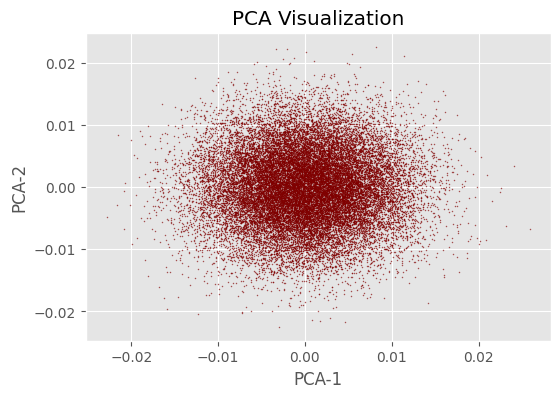

In [ ]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()

In [ ]:
import re

In [ ]:
# Validate words
words_pattern = "^\\b(?:\\w|-)+\\b$"
re.match(words_pattern, 'word') # Returns Match object
re.match(words_pattern, 'pet-friendly') # Returns Match object
re.match(words_pattern, 'not a word') # Returns None

In [ ]:
re.match(words_pattern, 'not a word') # Returns None